In [180]:
import numpy as np
import matplotlib.pyplot as pyp
import sys
import os
import matplotlib
import pandas as pd
import csv
import scipy.interpolate as interpolate
%matplotlib inline

In [125]:
dirc_pre = './'
NFM_dirc = '%s/MountaintopNoiseFigure/'%(dirc_pre)
ant_dirc = "%s/Antennas/"%(dirc_pre)
predictDirc = '%s/PredictedSpectra'%(dirc_pre)
outDirc = "%s/comparisons/"%(dirc_pre)

# VHF Terminated Loads

In [126]:
fmin = 20
fmax = 600
boxno = 2
frac_sky = 0.0

In [127]:
predictFile = '%s/manufacturer_%d-%dMHZ_fracsky%1.2f_TerminatedInput_Box%d.csv'%(predictDirc,fmin,fmax, frac_sky, boxno)
prediction = pd.read_csv(predictFile)

In [128]:
measDirc = "/home/radio/data/beacon_august2018/terminated_loads/"
measFi = "%s/specanalyzer_run3_2018-08-03_08-50-53.hdf5"%measDirc
measSpecHead = pd.read_hdf(measFi, key='header')
measSpectra = pd.read_hdf(measFi, key='spectra')

In [129]:
print(measSpecHead)

                               2018-08-03-05-08-59-49 2018-08-03-05-08-59-59
ACPR_ADJC_CH_BW                         10.350000 MHZ          10.350000 MHZ
ACPR_CHANNEL_SPACING                    10.350000 MHZ          10.350000 MHZ
ACPR_LOWER_CH_LINE_MARKER_INFO               0.000000               0.000000
ACPR_LOWER_CH_PWR                        10.000000 DB           10.000000 DB
ACPR_MAIN_CH_BW                         10.350000 MHZ          10.350000 MHZ
ACPR_MAIN_CH_LINE_MARKER_INFO                0.000000               0.000000
ACPR_MAIN_CH_PWR                        10.000000 DBM          10.000000 DBM
ACPR_UPPER_CH_LINE_MARKER_INFO               0.000000               0.000000
ACPR_UPPER_CH_PWR                        10.000000 DB           10.000000 DB
ACTIVE_MEASUREMENT                           0.000000               0.000000
AM_FM_DEMOD_FREQUENCY                   10.350000 MHZ          10.350000 MHZ
AM_FM_DEMOD_TIME                           3.000000 S             3.000000 S

                                      2018-08-03-05-08-59-49  \
freq_hz    [0.0, 1181818.1818181819, 2363636.3636363638, ...   
power_dBm  [-34.820999, -79.415001, -79.218002, -79.13300...   

                                      2018-08-03-05-08-59-59  
freq_hz    [0.0, 1181818.1818181819, 2363636.3636363638, ...  
power_dBm  [-34.828999, -79.393997, -79.208, -79.179001, ...  
Index(['2018-08-03-05-08-59-49', '2018-08-03-05-08-59-59'], dtype='object')
Index(['Unnamed: 0', 'frequency_MHz', 'combined_power_W_per_MHz',
       'galactic_power_W_per_MHz', 'ground_power_W_per_MHz',
       'system_power_W_per_MHz'],
      dtype='object')


(-40, -30)

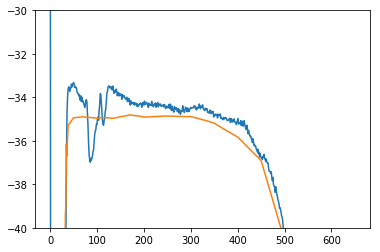

In [130]:
print(measSpectra)
print(measSpectra.keys())
spec = measSpectra[measSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw) )
print(prediction.keys())

pyp.plot(prediction.frequency_MHz, 10*np.log10(prediction.combined_power_W_per_MHz*1e3))
pyp.ylim(-40, -30)

In [131]:
print(-49.-10.*np.log10(300.e-3)+7+2.2)

-34.57121254719662


In [181]:
measDirc = "/home/radio/data/beacon_august2018/20180810/"
termFi = "%s/specanalyzer_run1_2018-08-10_10-06-52.hdf5"%measDirc
termSpecHead = pd.read_hdf(termFi, key='header')
termSpectra = pd.read_hdf(termFi, key='spectra')

antFi = "%s/specanalyzer_run2_2018-08-10_10-16-45.hdf5"%measDirc
antSpecHead = pd.read_hdf(antFi, key='header')
antSpectra = pd.read_hdf(antFi, key='spectra')

(-50, -28)

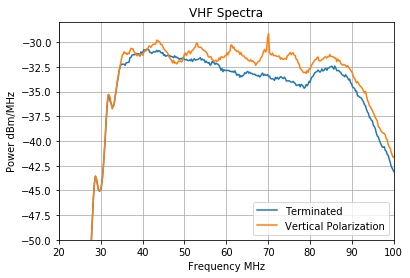

In [193]:
spec = termSpectra[termSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Terminated' )

spec = antSpectra[antSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Vertical Polarization')
#pyp.plot(prediction.frequency_MHz, 10*np.log10(prediction.combined_power_W_per_MHz*1e3))
pyp.legend()
pyp.grid()
pyp.ylabel('Power dBm/MHz')
pyp.xlabel('Frequency MHz')
pyp.title('VHF Spectra')
pyp.xlim(20,100)
pyp.ylim(-50,-28)

In [134]:
measDirc = "/home/radio/data/beacon_august2018/20180808/"
termFi = "%s/specanalyzer_run4_2018-08-08_15-22-47.hdf5"%measDirc
termSpecHead = pd.read_hdf(termFi, key='header')
termSpectra = pd.read_hdf(termFi, key='spectra')

antFi = "%s/specanalyzer_run5_2018-08-08_15-28-17.hdf5"%measDirc
antSpecHead = pd.read_hdf(antFi, key='header')
antSpectra = pd.read_hdf(antFi, key='spectra')

(-40, -30)

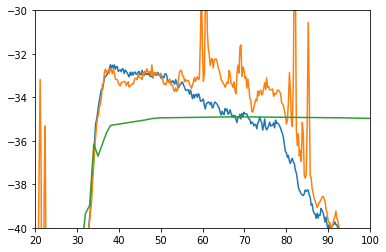

In [135]:
spec = termSpectra[termSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Box 1, Terminated, 4 x VLFX80' )

spec = antSpectra[antSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='VPOL, Box1, Bicone, 4 x VLFX80')
pyp.plot(prediction.frequency_MHz, 10*np.log10(prediction.combined_power_W_per_MHz*1e3))

pyp.xlim(20,100)
pyp.ylim(-40,-30)

In [136]:
measDirc = "/home/radio/data/beacon_august2018/20180808/"
singleFi = "%s/specanalyzer_run6_2018-08-08_16-21-31.hdf5"%measDirc
singleSpecHead = pd.read_hdf(singleFi, key='header')
singleSpectra = pd.read_hdf(singleFi, key='spectra')

aveFi = "%s/specanalyzer_run7_2018-08-08_17-12-22.hdf5"%measDirc
aveSpecHead = pd.read_hdf(aveFi, key='header')
aveSpectra = pd.read_hdf(aveFi, key='spectra')

(-40, -30)

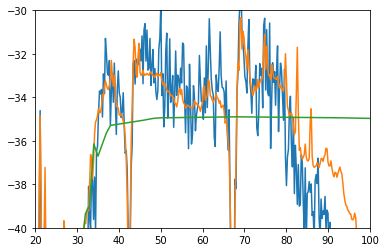

In [137]:
spec = singleSpectra[singleSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='47, 67 MHz Notch, NLP100, NLP90, Box1 Singles Vpol' )

spec = aveSpectra[aveSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='47, 67 MHz Notch, NLP100, NLP90, Box1 100-Ave Vpol')
pyp.plot(prediction.frequency_MHz, 10*np.log10(prediction.combined_power_W_per_MHz*1e3))

pyp.xlim(20,100)
pyp.ylim(-40,-30)

In [148]:
measDirc = "/home/radio/data/beacon_august2018/20180809/"
singleFi = "%s/specanalyzer_run9_2018-08-09_15-42-01.hdf5"%measDirc
singleSpecHead = pd.read_hdf(singleFi, key='header')
singleSpectra = pd.read_hdf(singleFi, key='spectra')

aveFi = "%s/specanalyzer_run10_2018-08-09_15-46-16.hdf5"%measDirc
aveSpecHead = pd.read_hdf(aveFi, key='header')
aveSpectra = pd.read_hdf(aveFi, key='spectra')

aveFi = "%s/specanalyzer_run11_2018-08-09_16-00-35.hdf5"%measDirc
aveSpecHead = pd.read_hdf(aveFi, key='header')
aveSpectra = pd.read_hdf(aveFi, key='spectra')

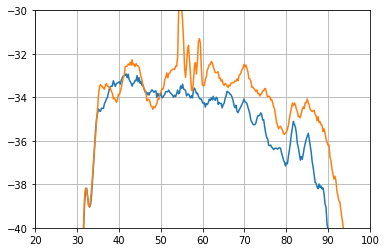

In [150]:
spec = singleSpectra[singleSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw), label='47, 67 MHz Notch, NLP100, NLP90, Box1 Singles Vpol' )

spec = aveSpectra[aveSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw), label='47, 67 MHz Notch, NLP100, NLP90, Box1 100-Ave Vpol')
#pyp.plot(prediction.frequency_MHz, 10*np.log10(prediction.combined_power_W_per_MHz*1e3))

pyp.xlim(20,100)
pyp.ylim(-40,-30)
pyp.grid(True,which='both')

#UHF Spectra

In [166]:
measDirc = "/home/radio/data/beacon_august2018/20180810/"
termFi = "%s/specanalyzer_run23_2018-08-10_15-29-50.hdf5"%measDirc
termHead = pd.read_hdf(termFi, key='header')
termSpectra = pd.read_hdf(termFi, key='spectra')

att60dBFi = "%s/specanalyzer_run25_2018-08-10_15-45-00.hdf5"%measDirc
atten60Head = pd.read_hdf(att60dBFi, key='header')
atten60Spectra = pd.read_hdf(att60dBFi, key='spectra')

att40dBFi = "%s/specanalyzer_run26_2018-08-10_15-48-45.hdf5"%measDirc
atten40Head = pd.read_hdf(att40dBFi, key='header')
atten40Spectra = pd.read_hdf(att40dBFi, key='spectra')

att20dBFi = "%s/specanalyzer_run27_2018-08-10_15-52-49.hdf5"%measDirc
atten20Head = pd.read_hdf(att20dBFi, key='header')
atten20Spectra = pd.read_hdf(att20dBFi, key='spectra')

att0dBFi = "%s/specanalyzer_run28_2018-08-10_16-02-03.hdf5"%measDirc
atten0Head = pd.read_hdf(att0dBFi, key='header')
atten0Spectra = pd.read_hdf(att0dBFi, key='spectra')

In [167]:
rbw=0.3

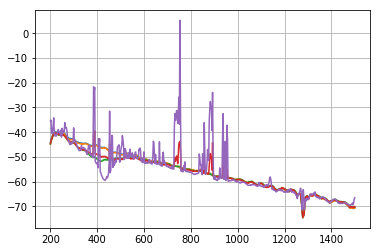

In [171]:
spec = termSpectra[termSpectra.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw), label='47, 67 MHz Notch, NLP100, NLP90, Box1 100-Ave Vpol')

spec = atten60Spectra[atten60Spectra.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw), label='47, 67 MHz Notch, NLP100, NLP90, Box1 100-Ave Vpol')

spec = atten40Spectra[atten40Spectra.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw), label='47, 67 MHz Notch, NLP100, NLP90, Box1 100-Ave Vpol')


spec = atten20Spectra[atten20Spectra.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw), label='47, 67 MHz Notch, NLP100, NLP90, Box1 100-Ave Vpol')

spec = atten0Spectra[atten0Spectra.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw), label='47, 67 MHz Notch, NLP100, NLP90, Box1 100-Ave Vpol')

pyp.grid(True,which='both')
pyp.savefig("/home/radio/Desktop/UHF_spectra.pdf")

In [175]:
# Run 8 - VHF Vpol West Side 
# Run 1 - VHF Vpol West Side

measDirc = "/home/radio/data/beacon_august2018/20180811/"
termFi = "%s/specanalyzer_run2_2018-08-11_10-30-21.hdf5"%measDirc
termHead = pd.read_hdf(termFi, key='header')
termSpectra = pd.read_hdf(termFi, key='spectra')

notchAntFi = "%s/specanalyzer_run8_2018-08-11_11-09-42.hdf5"%measDirc
notchAntHead = pd.read_hdf(notchAntFi, key='header')
notchAntSpectra = pd.read_hdf(notchAntFi, key='spectra')

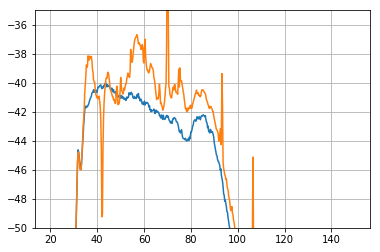

In [179]:
spec = termSpectra[termSpectra.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw), label='47, 67 MHz Notch, NLP100, NLP90, Box1 100-Ave Vpol')

spec = notchAntSpectra[notchAntSpectra.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw), label='47, 67 MHz Notch, NLP100, NLP90, Box1 100-Ave Vpol')

pyp.ylim(-50,-35)
pyp.grid(True,which='both')